In [31]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import norm, beta
from sklearn import metrics
plt.style.use('seaborn-poster')

%matplotlib inline

# Define path
HOME_DATA_PATH = "./data/property.csv"
USER_ACTIVITY_PATH = "./data/user_activity.csv"
USER_ITEM_POINT_PATH = "./data/user_item_point.csv"

In [4]:
# Display homes data
homes = pd.read_csv(HOME_DATA_PATH)
homes.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


In [5]:
homes.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4.925000e+03,4.930000e+03,4927.000000,4930.000000,3282.000000,4893.000000,4926.000000
mean,8.321284e+07,1.052041e+06,1.471890,71.653347,3.970750,2.417127,13.651035
std,5.289941e+07,3.797125e+06,0.579431,22.890889,1.280667,3.496221,8.483931
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-2.000000,0.000000
25%,4.320000e+07,0.000000e+00,1.000000,55.000000,3.000000,1.000000,8.000000
50%,7.200000e+07,7.200000e+05,1.000000,67.000000,4.000000,2.000000,14.000000
75%,1.080000e+08,1.440000e+06,2.000000,84.000000,4.000000,3.000000,18.000000
max,4.320000e+08,1.440000e+08,5.000000,263.000000,16.000000,225.000000,99.000000


In [6]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   item_id               4930 non-null   object 
 1   deposit               4925 non-null   float64
 2   monthly_rent          4930 non-null   int64  
 3   district_uuid         4929 non-null   object 
 4   room_qty              4927 non-null   float64
 5   unit_area             4930 non-null   int64  
 6   has_elevator          4913 non-null   object 
 7   building_floor_count  3282 non-null   float64
 8   unit_floor            4893 non-null   float64
 9   has_storage_area      4920 non-null   object 
 10  property_age          4926 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


In [7]:
# Visualize missing value
missing_stats = {}
for col in homes.columns:
    missing_data_count = homes[col].isna().sum()
    missing_percent = round(missing_data_count/len(homes)*100, 2)
    missing_stats[col] = {
        "percent": missing_percent,
        "count": missing_data_count
    }
    display(
        f"Column {col}: has {missing_percent}% missing data with {missing_data_count} missing entries")

'Column item_id: has 0.0% missing data with 0 missing entries'

'Column deposit: has 0.1% missing data with 5 missing entries'

'Column monthly_rent: has 0.0% missing data with 0 missing entries'

'Column district_uuid: has 0.02% missing data with 1 missing entries'

'Column room_qty: has 0.06% missing data with 3 missing entries'

'Column unit_area: has 0.0% missing data with 0 missing entries'

'Column has_elevator: has 0.34% missing data with 17 missing entries'

'Column building_floor_count: has 33.43% missing data with 1648 missing entries'

'Column unit_floor: has 0.75% missing data with 37 missing entries'

'Column has_storage_area: has 0.2% missing data with 10 missing entries'

'Column property_age: has 0.08% missing data with 4 missing entries'

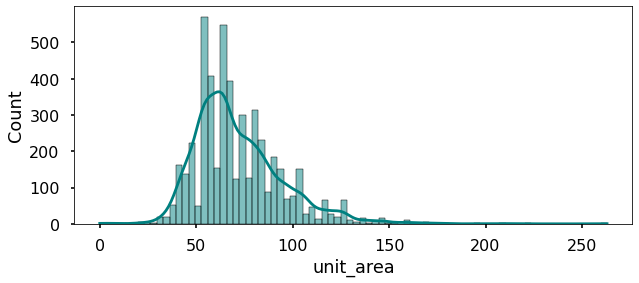

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(homes['unit_area'], color='teal', kde=True, bins=80)

In [ ]:
# Sanitize data
homes.drop(list(homes[homes.unit_area < 20].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.drop(list(homes[homes.property_age > 55].index), inplace=True)
homes.reset_index(drop=True, inplace=True)
homes.shape
homes.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0,42,False,3.0,0.0,True,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0,116,True,NaN,1.0,True,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0,74,False,2.0,0.0,True,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0,60,True,NaN,2.0,False,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0,45,True,NaN,1.0,True,4.0


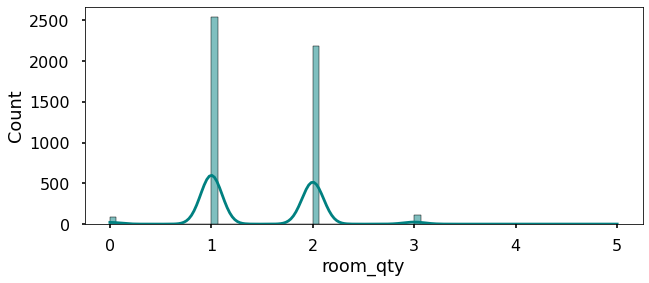

In [9]:
plt.figure(figsize=(10, 4))
sns.histplot(homes['room_qty'], color='teal', kde=True, bins=80)

In [142]:
# Predict room quantity based on unit area
homes.fillna(homes.mean(), inplace=True)

data = homes[['room_qty','unit_area']]

X = data[['unit_area']]
y = data[['room_qty']]

print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


encoder =LabelEncoder()
y_train = encoder.fit_transform(y_train)

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print(classification_report(y_pred,y_test))



      room_qty
0          1.0
1          2.0
2          1.0
3          1.0
4          1.0
...        ...
4925       0.0
4926       2.0
4927       1.0
4928       2.0
4929       1.0

[4930 rows x 1 columns]
              precision    recall  f1-score   support

         0.0       0.04      0.25      0.07         4
         1.0       0.87      0.83      0.85       793
         2.0       0.00      0.00      0.00         0
         3.0       0.80      0.04      0.07       674
         4.0       0.00      0.00      0.00         8

    accuracy                           0.46      1479
   macro avg       0.34      0.22      0.20      1479
weighted avg       0.83      0.46      0.49      1479



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and 

In [152]:
def predict_room(area : int):
  result = model.predict([[area]])
  print('So phong: ' + str(int(encoder.inverse_transform(result)[0])))

In [161]:
predict_room(300)

So phong: 4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.preprocessing import *
cats = ['district_uuid', 'has_elevator', 'has_storage_area']

for c in cats:
    le = LabelEncoder()
    homes[c] = le.fit_transform(homes[c].astype('str'))

homes.head()

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0,0,34,1.0,42,0,3.0,0.0,1,23.0
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0,4320000,102,2.0,116,1,NaN,1.0,1,16.0
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0,1440000,115,1.0,74,0,2.0,0.0,1,19.0
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0,864000,100,1.0,60,1,NaN,2.0,0,6.0
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0,1296000,74,1.0,45,1,NaN,1.0,1,4.0


In [ ]:
feats = [c for c in homes.columns if c not in ['item_id']]
feats

['deposit',
 'monthly_rent',
 'district_uuid',
 'room_qty',
 'unit_area',
 'has_elevator',
 'building_floor_count',
 'unit_floor',
 'has_storage_area',
 'property_age']

In [ ]:
home_orig = homes.copy()

# del homes['item_id']

homes.fillna(homes.mean(), inplace=True)
rb = StandardScaler()
home = rb.fit_transform(homes)
home = pd.DataFrame(home, columns=feats)
home.head()

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,-0.351107,-0.276876,-1.333738,-0.818353,-1.307482,-0.735340,-9.315229e-01,-0.693205,0.716913,1.167032
1,-0.214733,0.859492,0.202530,0.910532,1.942849,1.320184,4.271079e-16,-0.406392,0.716913,0.300776
2,-0.623854,0.101913,0.496228,-0.818353,0.098066,-0.735340,-1.893284e+00,-0.693205,0.716913,0.672028
3,-0.896602,-0.049602,0.157346,-0.818353,-0.516861,1.320184,4.271079e-16,-0.119579,-1.370156,-0.936734
4,-1.032975,0.064034,-0.430051,-0.818353,-1.175712,1.320184,4.271079e-16,-0.406392,0.716913,-1.184236
